## Telco Customer Churn Prediction

## Business Understanding

##### **Problem Statement:** 
Telco is facing high levels of competition and customer churn, which significantly impact it profitability. To maintain a competitive edge and reduce churn, telco management wants to identify customers who are at risk of leaving.

### **Objective:**
To build a strong machine learning pipeline to predict customers who are likely to churn. The preidiction modelling should analyze historical customer dataset provided for this project. The insights gained will enable the company to implement targeted retention strategies, thereby reducing churn rates and increasing customer loyalty.

### Key Metrics and Success Criteria

- The Model should have a accuracy score of 85% (on balance data)
- Good models are expected to have an F1 score of > 0.80 or 80%
- An ROC curve of 80% is ideal for the model generalize well
- There should be atlest  4 Baseline models
- All hyperparameter turning should only be only to Baseline models if they exceeded thier F1 score 



### Features

**customerID:** Unique Identifier for the each customer

**gender:** Gender of the customer

**SeniorCitizen:** Whether the customer is a senior citizen or not

**Partner:** Whether the customer has a partner or not 

**Dependents:** Whether the customer has dependents or not 

**tenure:** Number of months the customer has stayed with the company

**PhoneService:** Whether the customer has phone service or not 

**MultipleLines:** Whether the customer has multiple lines or not 

**InternetService:** Customer’s internet service provider 

**OnlineSecurity:** Whether the customer has online security or not 

**OnlineBackup:** Whether the customer has online backup or not 

**DeviceProtection:** Whether the customer has device protection or not 

**TechSupport:** Whether the customer has tech support or not 

**StreamingTV:** Whether the customer has streaming TV or not 

**StreamingMovies:** Whether the customer has streaming movies or not 

**Contract:** The contract term of the customer 

**PaperlessBilling:** Whether the customer has paperless billing or not 

**PaymentMethod:** The customer’s payment method 

**MonthlyCharges:** The amount charged to the customer monthly

**TotalCharges:** The total amount charged to the customer

**Churn:** Whether the customer has churned or not 


### **Hpypthesis Statements**

#### **Null Hypothesis (H₀):** There is no association between the number of services a customer uses and their likelihood of churning.
 
#### This hypothesis assumes that using more or fewer services doesn't affect customer churn.
 
#### **Alternative Hypothesis (H₁):** There is a negative association between the number of services a customer uses and their likelihood of churning.

### **Analytical Question:** 

1. ##### How do customer age, gender, and location affect churn rates, is there a specific age group that exhibits the highest churn rate and are there specific demographic groups that have higher churn rates compared to others?

2. ##### How do churn rates vary among different age groups based on the type of subscription plan they have?

3. ##### How does the average monthly usage (e.g., minutes, data usage) correlate with churn, are customers with higher usage more or less likely to churn?

4. ##### How does the length of the contract (e.g., month-to-month vs. yearly) influence churn, Are customers with shorter contracts more prone to churning?

5. ##### How do payment methods (e.g., automatic payments vs. manual payments) impact churn, is there a correlation between payment issues (e.g., late payments) and churn rates?

6. ##### How does the length of time a customer has been with the company affect their likelihood to churn, are newer customers more likely to churn compared to long-term customers?


## **Data Understanding**

### Data Importations

In [2]:
# Import data manipulation packages

import pyodbc    
from dotenv import dotenv_values
import numpy as np
import pandas as pd
import warnings 
import matplotlib as plt 
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [37]:
# Install pyodbc to connect to database to get the first dataset from
# Install python-dotenv to store sensitive information
#%pip install pyodbc  
#%pip install python-dotenv
#%pip install numpy
#%pip install pandas
#pip install matplotlib
#%pip install seaborn

#### Create a connection by accessing the connection string with the environment variables


In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")



In [4]:
# use f sring to connect to the database.
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [5]:
# connect to database using pyodbc
connection = pyodbc.connect(connection_string)
# Write SQL Query to get data from the database
query = "SELECT * FROM LP2_Telco_churn_first_3000"

In [6]:
# Get data using the SQL query and the connection.
data = pd.read_sql(query, connection)

In [7]:
# Preview the data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


#### Download the second data from GitHub repository and laod to daframe.

In [8]:
# Having Gotten the second data from GitHub repository, load it into dataframe using read_scv.
data2 = pd.read_csv(r"C:\Users\USER\Desktop\Customer-churn-prediction-\data\LP2_Telco-churn-second-2000.csv")

In [9]:
# Preview the data2
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [10]:
# Merge the two dataset together.

df = pd.concat([data, data2], ignore_index=True)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


### **Key Notes**

- Values in some columns in the two datasets are not the same (True or False, to be same as Yes or No) needs to be changes to be the same accross the two datasets.
- There are missing values in some columns in the dataset that needs to be taken care of.
- The numerical feature of the dataset is not evenly distributed, as shown in the dot describe, this needs to be taken into considration when building the model.
- There are no duplicate values in the dataset.
- The standard deviation of the numerical feature are much.
- The TotalCharges column is right-skewed disribution.
- The MonthlyCharges also column is right-skewed distribution.
- Month on month contract type has the highest count of contract types while one year contract type has the lowest.
- Fiber optic Internet Service has the highest count of internet types while one year No Internet type has the lowest.
-Eletronic check is the highest payment method but mailed check is the lowest payment method.
- Telco has more male cutomers than female.
- Two year contract type has the highest churn rate followed by one year contract while people with month to month contract stay lonfer in the company.
- There is no really correlation in the months customers have stayed in the company and their churn rate, some customers that have for couple pf months churn while some stay.
- 

##### Replace the values (True or False to Yes oe No) in the colums to be same across the tables for consistency

In [74]:
# List the columns and replace True or False to Yes or No.
df = pd.DataFrame(data)

# Columns to be updated
columns_to_update = [
    'Partner', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'Churn'
]

# Apply the transformation to the specified columns
for column in columns_to_update:
    df[column] = df[column].apply(lambda x: 'Yes' if x is True else 'No' if x is False else x)


In [12]:
# Check the info to confirm if all the columns are in the correct data type and see the nulls too.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [13]:
# Check the total nulls in easch columns.
df.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [31]:
df.shape

(5043, 22)

In [14]:
# Check the mean, median, mode and standard deviation of the numerical values.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [15]:
# Check the decsribe of the categorical values.
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5043,5043,5043,5043,5043,4774,5043,4392,4392,4392,4392,4392,4392,5043,5043,5043,5038.000000,5042
unique,5043,2,4,4,4,5,3,5,5,5,5,5,5,3,4,4,4884.000000,4
top,3186-AJIEK,Male,False,False,True,False,Fiber optic,False,False,False,False,False,True,Month-to-month,True,Electronic check,20.200001,False
freq,1,2559,1538,2070,2731,1437,2248,1478,1320,1296,1476,1190,1199,2744,1776,1700,5.000000,2219


In [16]:
# Print all columns and their unique values
df = pd.DataFrame(data)
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}':")
    print(unique_values)
    print()

Column 'customerID':
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '1891-FZYSA' '4770-UEZOX'
 '1A1:U3001038-RQOST']

Column 'gender':
['Female' 'Male']

Column 'SeniorCitizen':
[False  True]

Column 'Partner':
[ True False]

Column 'Dependents':
[False  True]

Column 'tenure':
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column 'PhoneService':
[False  True]

Column 'MultipleLines':
[None False True]

Column 'InternetService':
['DSL' 'Fiber optic' 'No']

Column 'OnlineSecurity':
[False True None]

Column 'OnlineBackup':
[True False None]

Column 'DeviceProtection':
[False True None]

Column 'TechSupport':
[False True None]

Column 'StreamingTV':
[False True None]

Column 'StreamingMovies':
[False True None]

Column 'Contract':
['Month-to-month' 'One year' 'Two year']

Column 'PaperlessBilling':
[ True False]

Co

In [17]:
# Check duplicate values.
df.duplicated().sum()

np.int64(0)

#### Univariate Analysis

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

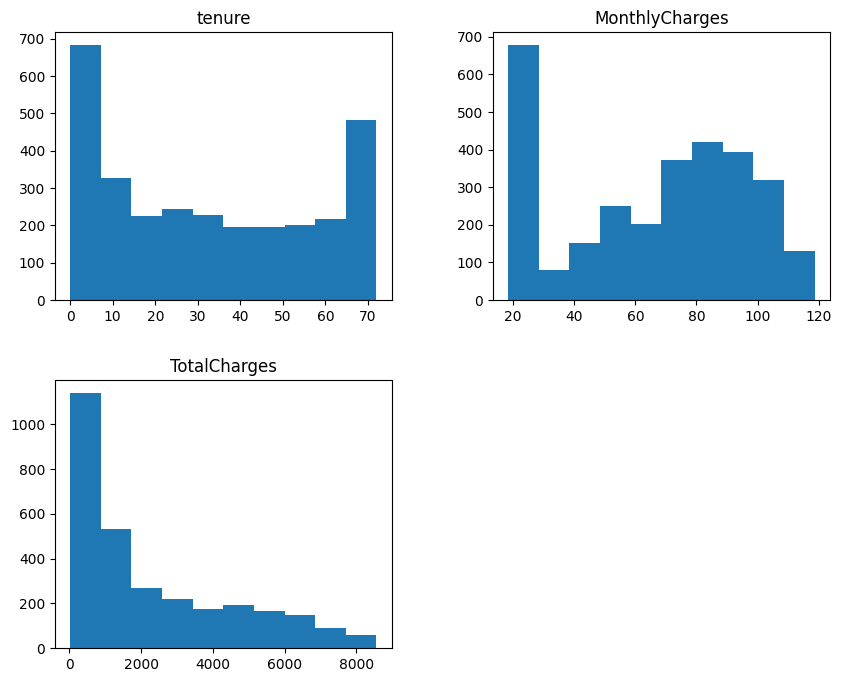

In [18]:
# checking the distribution of the numerical features of the dataset.
df.hist(figsize=(10, 8),grid=False) 




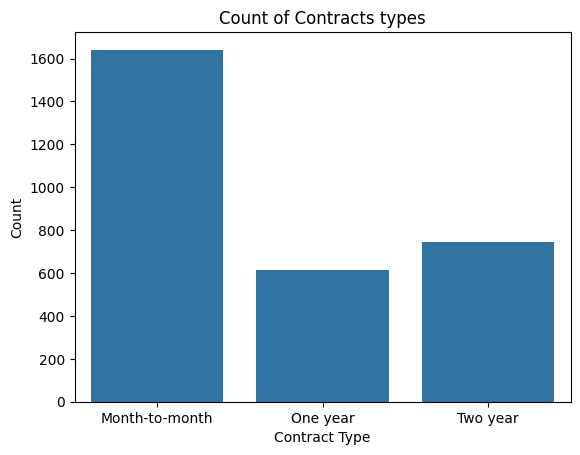

In [22]:
# Distribution of contract types.

sns.countplot(x='Contract', data=df)
plt.title('Count of Contracts types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


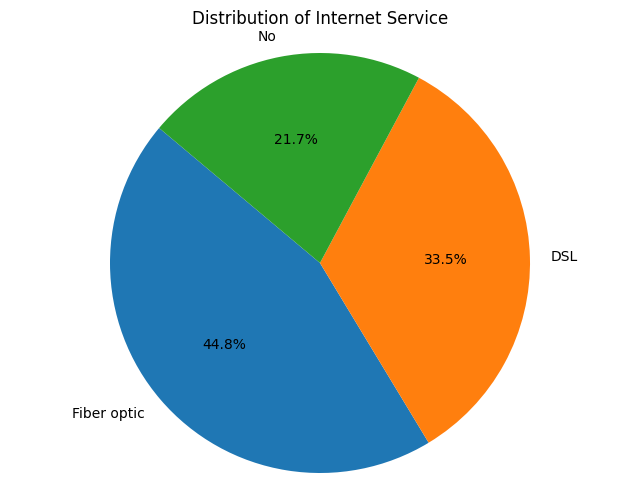

In [23]:
# Count of each interner service.

data = df['InternetService'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Internet Service')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


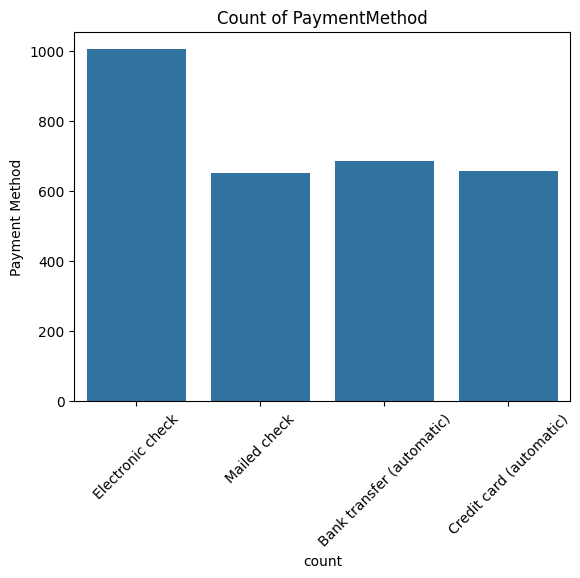

In [24]:
# Count of each PaymentMethod.

sns.countplot(x='PaymentMethod', data=df)
plt.title('Count of PaymentMethod')
plt.xlabel('count')
plt.ylabel('Payment Method')
plt.xticks(rotation=45) 
plt.show()


Text(0.5, 1.0, 'Distribution of Gender')

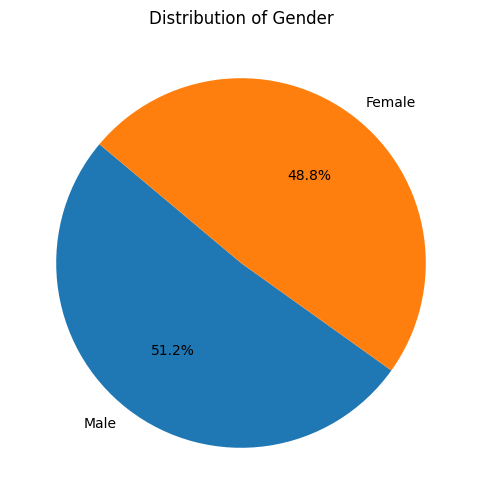

In [25]:
# Gender distribution.

data = df['gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')


#### Bi-variate Analysis

<Figure size 1000x800 with 0 Axes>

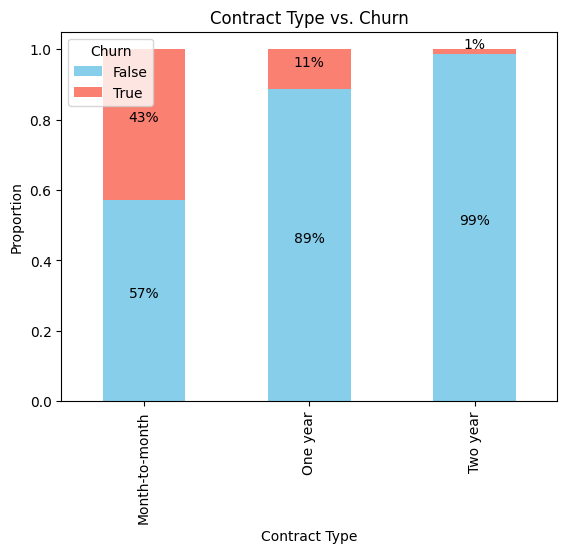

In [26]:
# How does contract type impact churn rates?

# Contract Type vs. Churn

plt.figure(figsize=(10, 8))

# Grouping and preparing the data
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

# Plotting the stacked bar chart
ax = contract_churn.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

# Adding data labels to each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    ax.annotate(f'{height:.0%}', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Contract Type vs. Churn')
plt.xlabel('Contract Type')
plt.ylabel('Proportion')
plt.legend(title='Churn', loc='best')
plt.show()


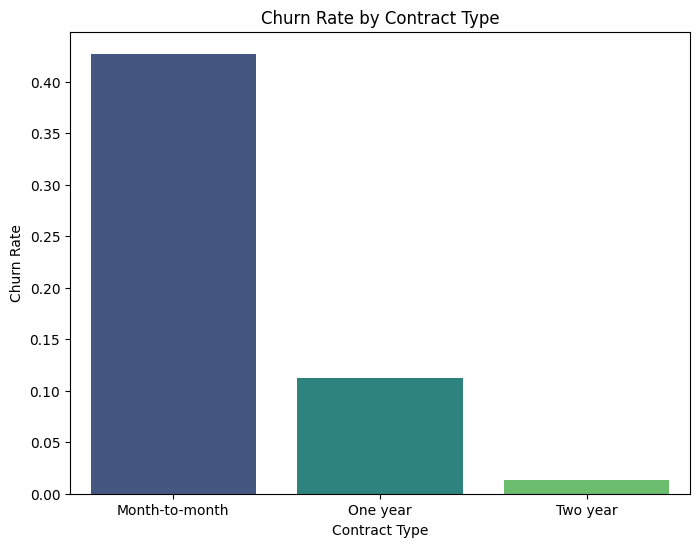

In [27]:
# How does the type of contract (Month-to-month, One year, Two year) affect the churn rate among customers?
# Calculate churn rates by contract type
contract_churn_rates = df.groupby('Contract')['Churn'].mean().reset_index()

# Plotting the churn rates
plt.figure(figsize=(8, 6))
sns.barplot(x='Contract', y='Churn', data=contract_churn_rates, palette='viridis')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()


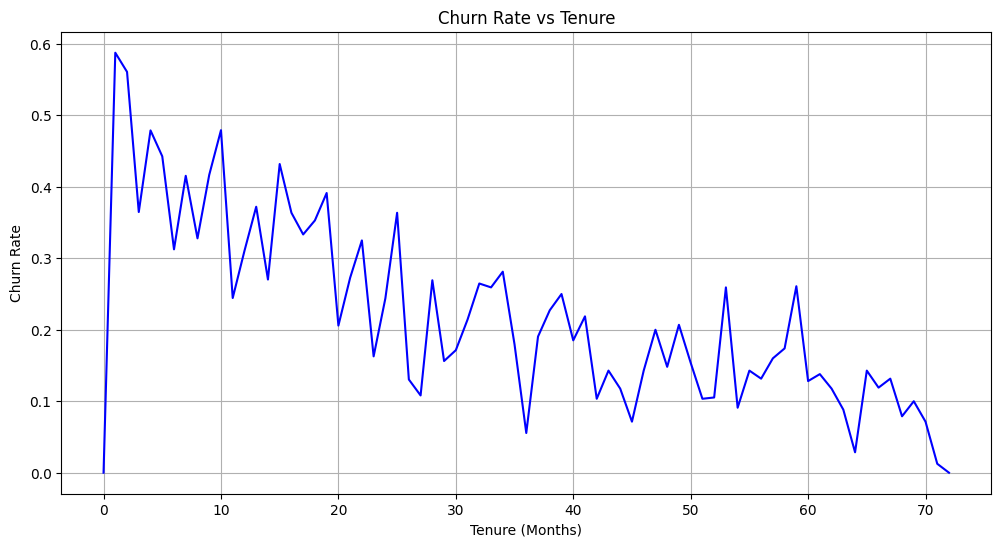

    tenure     Churn
0        0       0.0
1        1  0.587549
2        2  0.560748
3        3  0.364706
4        4  0.478873
..     ...       ...
68      68  0.078947
69      69       0.1
70      70  0.071429
71      71    0.0125
72      72       0.0

[73 rows x 2 columns]


In [28]:


# How does the tenure (number of months a customer has stayed with the company) relate to the likelihood of churn?
# Calculate churn rates by tenure
tenure_churn_rates = df.groupby('tenure')['Churn'].mean().reset_index()

# Plotting the churn rates
plt.figure(figsize=(12, 6))
sns.lineplot(x='tenure', y='Churn', data=tenure_churn_rates, color='b')
plt.title('Churn Rate vs Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()

# Display the churn rates numerically
print(tenure_churn_rates)




### Multi-variate Analysis

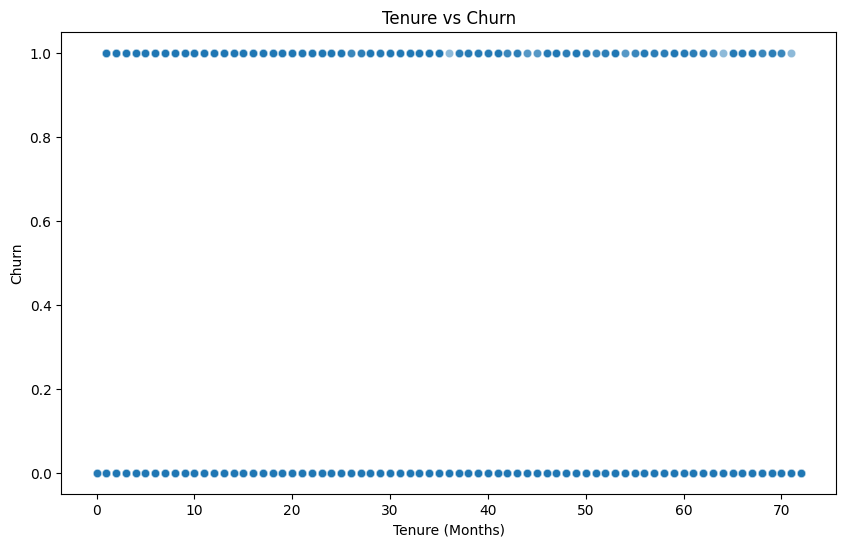

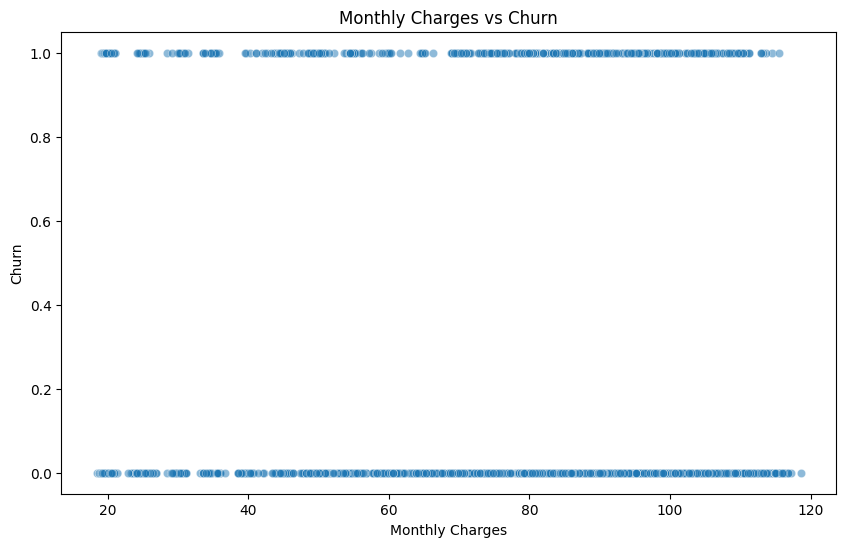

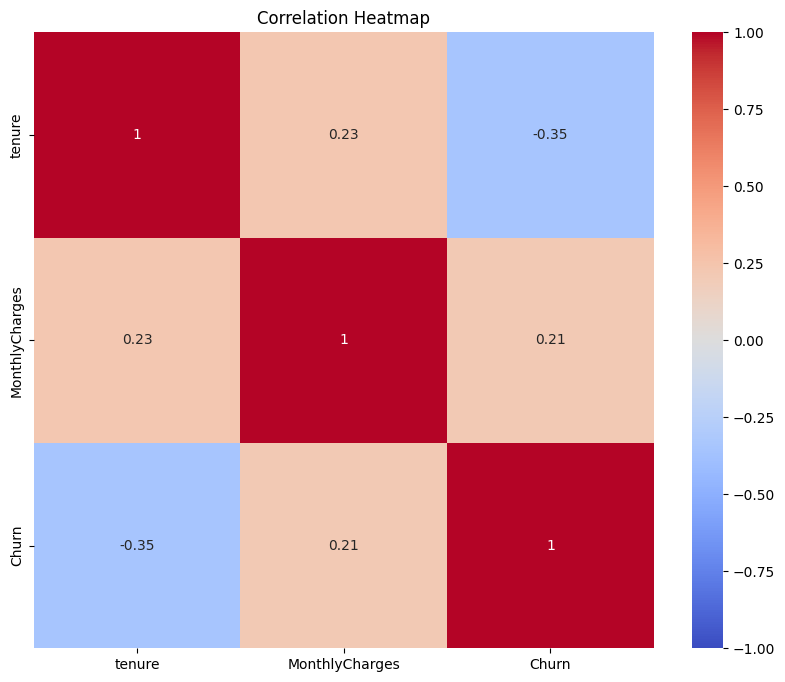

In [29]:

# How do the tenure and monthly charges of customers affect their likelihood of churning?

# Scatter plot: Tenure vs Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='Churn', data=df, alpha=0.5)
plt.title('Tenure vs Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn')
plt.show()

# Scatter plot: MonthlyCharges vs Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='Churn', data=df, alpha=0.5)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn')
plt.show()

# Heatmap: Tenure and MonthlyCharges vs Churn
plt.figure(figsize=(10, 8))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'Churn']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


## Hypothesis Tests

In [32]:
# Null Hypothesis:There is no association between the number of services a customer uses and their likelihood of churning.
 
 
# Alternative Hypothesis: There is a negative association between the number of services a customer uses and their likelihood of churning.

from scipy.stats import chi2_contingency
df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['num_services'], df['churn'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpret the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is an association between the number of services used and churn likelihood.")
else:
    print("Fail to reject the null hypothesis: There is no association between the number of services used and churn likelihood.")


Chi-Square Statistic: 2.0
P-Value: 0.36787944117144245
Degrees of Freedom: 2
Expected Frequencies:
[[2. 2.]
 [2. 2.]
 [2. 2.]]
Fail to reject the null hypothesis: There is no association between the number of services used and churn likelihood.


### Analytical questions.

In [ ]:
# How do customer age and gender affect churn rates, is there a specific age group that exhibits the 
# highest churn rate and are there specific demographic groups that have higher churn rates compared to others?



The age group with the highest churn rate is: 1 with a churn rate of 18.07%


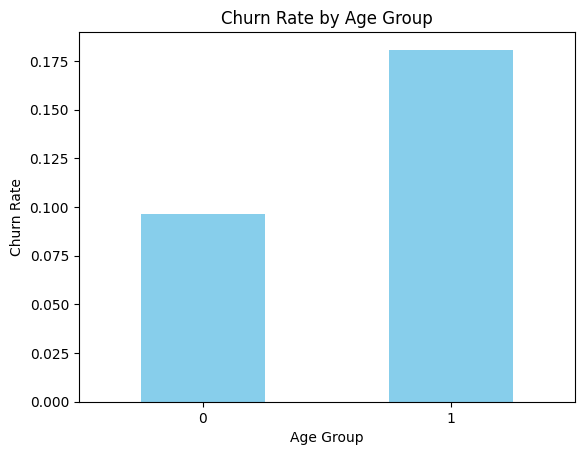

In [19]:
age_group_churn = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()

# Extract churn rates
churn_rates = age_group_churn['Yes']

# Find the age group with the highest churn rate
highest_churn_age_group = churn_rates.idxmax()
highest_churn_rate = churn_rates.max()

print(f"The age group with the highest churn rate is: {highest_churn_age_group} with a churn rate of {highest_churn_rate:.2%}")

# Visualize the churn rates for each age group
churn_rates.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()